<a href="https://colab.research.google.com/github/leenagite/Internship/blob/main/advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler, power_transform
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

#library for error detection in regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error

#libraries for regularisation
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

#library for EDA
from scipy.stats import zscore

#Library for saving data
import pickle

#model evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#library for GridSearchCV 
from sklearn.model_selection import GridSearchCV
#Library for saving data
import pickle

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df.head(20)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [4]:
df=df.drop(["Unnamed: 0"],axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

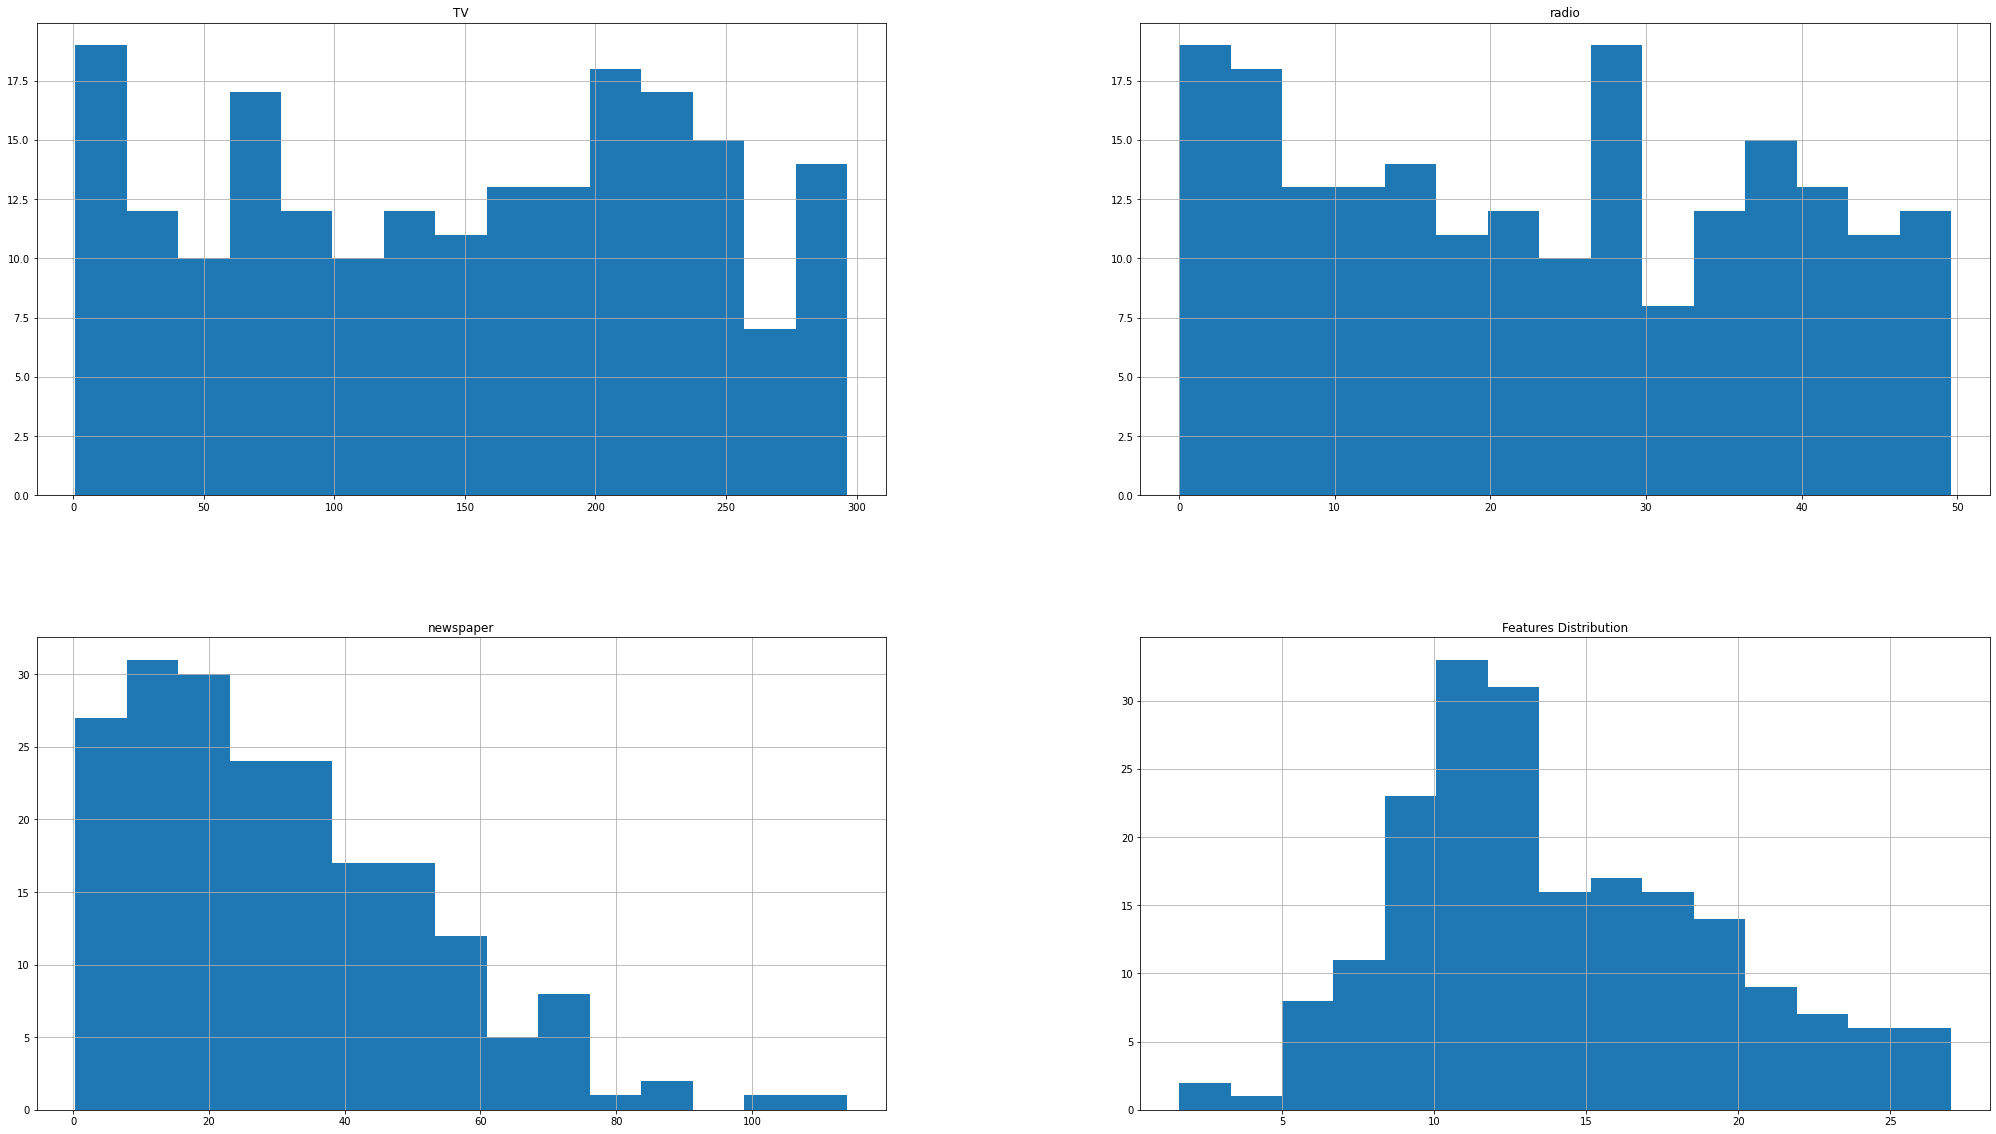

In [9]:
df.hist(figsize=(35,20),bins = 15)
plt.title("Features Distribution")
plt.show()

In [10]:
x=df.drop(["sales"],axis=1)
x.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
dtype: float64

In [12]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

df_new.skew()

TV          -0.315199
radio       -0.242968
newspaper   -0.077942
dtype: float64

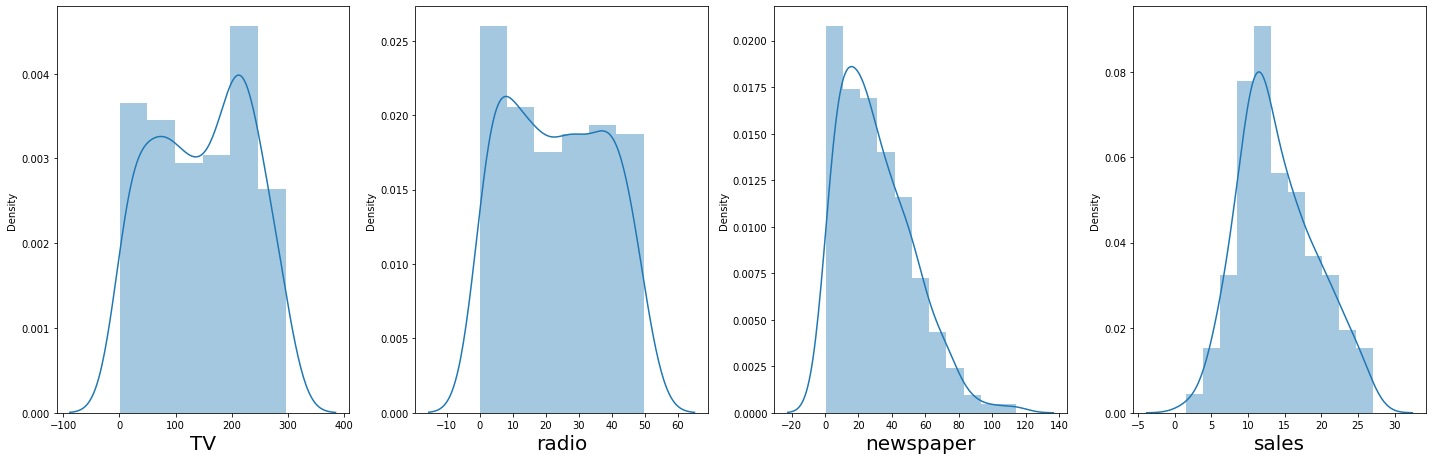

In [13]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=16:
       ax=plt.subplot(4,4,plotnumber)
       sns.distplot(df[column])         #distribution plot- we use for continous data
       plt.xlabel(column,fontsize=20)

    plotnumber+=1
plt.tight_layout()

In [14]:
x=df.drop(columns=["sales"])
y=df['sales']

In [15]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)

vif=pd.DataFrame()
vif["quality"]=[variance_inflation_factor(x_scaler,i) for i in range(x_scaler.shape[1])]
vif["feature"]=x.columns
vif

,quality,feature
0,1.004611,TV
1,1.144952,radio
2,1.145187,newspaper


In [16]:
data_corr=df.corr()
data_corr["sales"].sort_values(ascending=False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

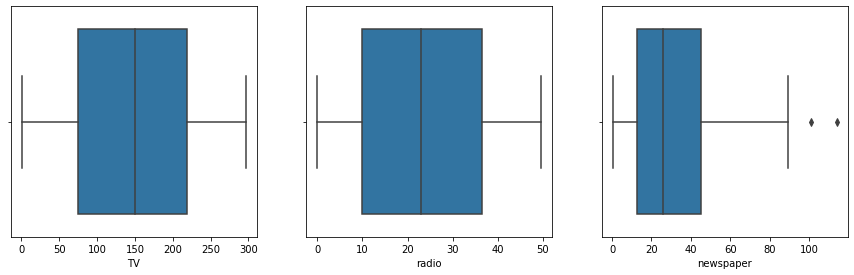

In [17]:
x=df.drop("sales",axis=1)
y=df["sales"]

plt.figure(figsize=(15,50))
graph=1

for column in x:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(x[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
    
plt.show()

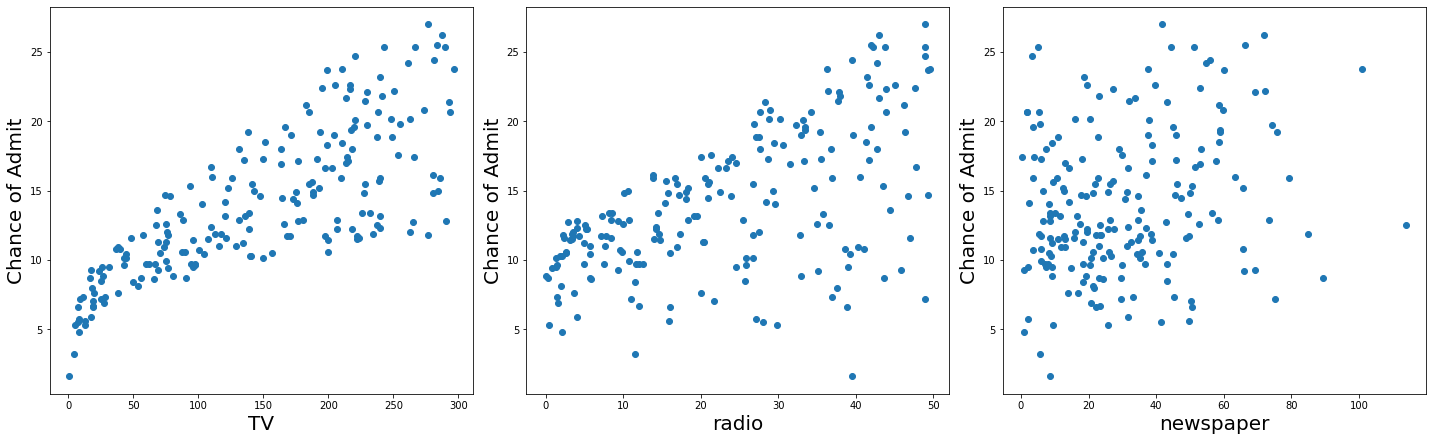

In [18]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in x:
    if plotnumber<=15:
        X=plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [19]:
x=df.drop(columns=["sales"])
y=df['sales']

In [20]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,TV,radio,newspaper
0,0.969852,0.981522,1.778945
1,-1.197376,1.082808,0.669579
2,-1.516155,1.528463,1.783549
3,0.052050,1.217855,1.286405
4,0.394182,-0.841614,1.281802


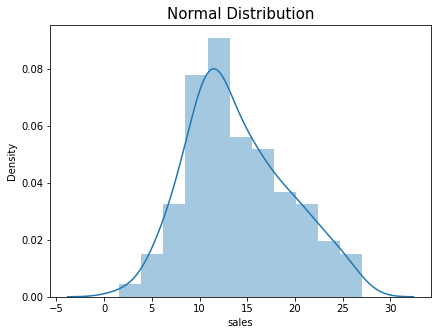

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Normal Distribution",fontsize=15)
sns.distplot(y)

In [22]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

In [23]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test,y_train, y_test=train_test_split(x_scaled,y,test_size=.25,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    r2=r2_score(y_test,predrf)
    if r2>maxAccu:
        maxr2=r2
        maxRS=i

print("Best r2 score is", maxr2,"on Random State",maxRS)

Best r2 score is 0.8565135936400856 on Random State 199


In [24]:
from sklearn.model_selection import train_test_split

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, Y_train, Y_rem = train_test_split(x,y, train_size=0.8,random_state=199)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, Y_valid, Y_test = train_test_split(X_rem,Y_rem, test_size=0.5)

In [25]:
print(X_train.shape), print(Y_train.shape)
print(X_valid.shape), print(Y_valid.shape)
print(X_test.shape), print(Y_test.shape)

(160, 3)
(160,)
(20, 3)
(20,)
(20, 3)
(20,)


(None, None)

,Importance
Features,
TV,0.630
radio,0.362
newspaper,0.008


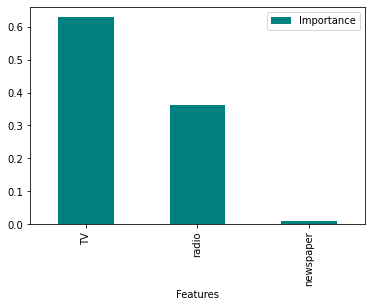

In [26]:
rf=RandomForestRegressor()
rf.fit(X_train, Y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='teal')
importances

In [28]:
LR=LinearRegression()
RR=Ridge(alpha=1e-2, normalize=True)
LasR=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
svr=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
DTR=DecisionTreeRegressor(criterion="poisson", random_state=111)
RFR=RandomForestRegressor(max_depth=2, max_features="sqrt")
KNR=KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
GBR=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
ABR=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
ETR=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
XGBR=XGBRegressor()
LGBR=LGBMRegressor()


models= []
models.append(('LinearRegression', LR))
models.append(('Ridge Regressor', RR))
models.append(('Lasso Regressor', LasR))
models.append(('SVR',svr))
models.append(('DecisionTreeRegressor',DTR))
models.append(('RandomForestRegressor',RFR))
models.append(('KNeighborsRegressor',KNR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('AdaBoostRegressor',ABR))
models.append(('ExtraTreesRegressor',ETR))
models.append(('XGBRegressor',XGBR))
models.append(('LGBMRegressor',LGBR))

In [29]:
Model= []
score= []
cvs=[]
difference=[]
RMSE=[]

****************************************** LinearRegression ********************************************************


LinearRegression()


R2 Score is: 83.90165159998968


Cross Validation Score: 6.349278412547559


R2 Score - Cross Validation Score is 77.55237318744211
RMSE Score is: 2.3413015363565663


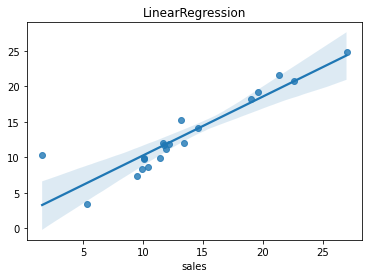

****************************************** Ridge Regressor ********************************************************


Ridge(alpha=0.01, normalize=True)


R2 Score is: 83.9238789565764


Cross Validation Score: 12.012199050021053


R2 Score - Cross Validation Score is 71.91167990655535
RMSE Score is: 2.3396846338404322


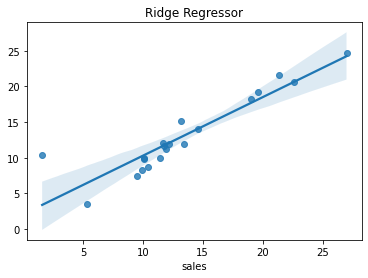

****************************************** Lasso Regressor ********************************************************


Lasso(alpha=0.01, max_iter=100000.0, normalize=True)


R2 Score is: 84.07363230712309


Cross Validation Score: 12.992295864688117


R2 Score - Cross Validation Score is 71.08133644243497
RMSE Score is: 2.328761744063285


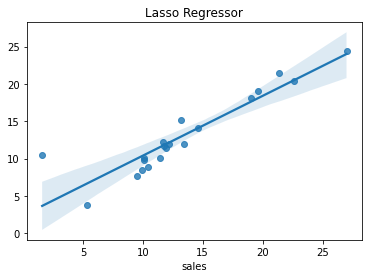

****************************************** SVR ********************************************************


SVR(epsilon=0.2, gamma='auto', kernel='poly')


R2 Score is: 82.85436600402433


Cross Validation Score: -421.4094225748207


R2 Score - Cross Validation Score is 504.26378857884504
RMSE Score is: 2.4162588815073534


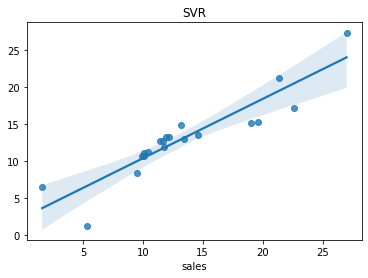

****************************************** DecisionTreeRegressor ********************************************************


DecisionTreeRegressor(criterion='poisson', random_state=111)


R2 Score is: 68.83082938891421


Cross Validation Score: -225.16320565554415


R2 Score - Cross Validation Score is 293.99403504445837
RMSE Score is: 3.2578367055455684


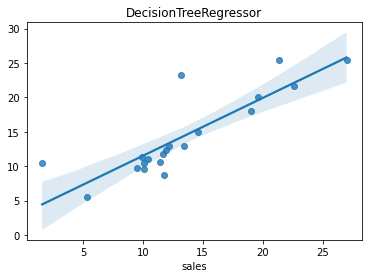

****************************************** RandomForestRegressor ********************************************************


RandomForestRegressor(max_depth=2, max_features='sqrt')


R2 Score is: 55.8479439712685


Cross Validation Score: -90.97589109661568


R2 Score - Cross Validation Score is 146.82383506788418
RMSE Score is: 3.877413830957104


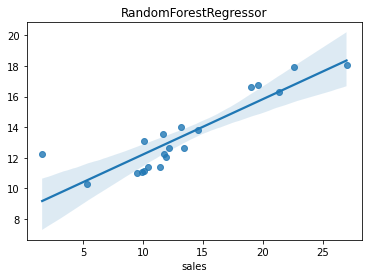

****************************************** KNeighborsRegressor ********************************************************


KNeighborsRegressor(algorithm='kd_tree', n_neighbors=2)


R2 Score is: 86.54822763611644


Cross Validation Score: -183.19883535537872


R2 Score - Cross Validation Score is 269.74706299149517
RMSE Score is: 2.1402102700435766


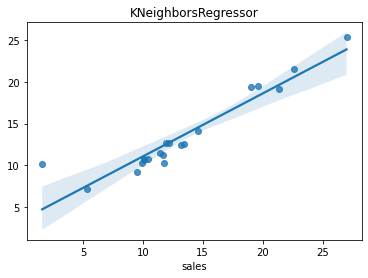

****************************************** GradientBoostingRegressor ********************************************************


GradientBoostingRegressor(loss='quantile', max_depth=5, n_estimators=200)


R2 Score is: 87.98957124854508


Cross Validation Score: -1719.348218828467


R2 Score - Cross Validation Score is 1807.337790077012
RMSE Score is: 2.0223016893720347


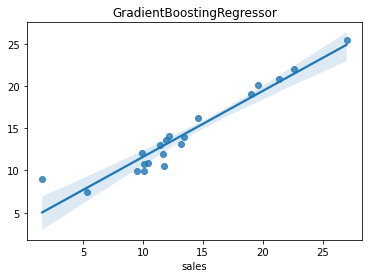

****************************************** AdaBoostRegressor ********************************************************


AdaBoostRegressor(learning_rate=1.05, n_estimators=300, random_state=42)


R2 Score is: 94.14662338199932


Cross Validation Score: -226.68192349608694


R2 Score - Cross Validation Score is 320.8285468780863
RMSE Score is: 1.4117894209056512


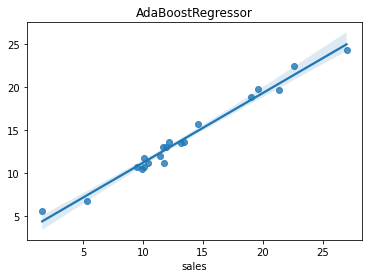

****************************************** ExtraTreesRegressor ********************************************************


ExtraTreesRegressor(max_features='sqrt', n_estimators=200, n_jobs=6)


R2 Score is: 90.43445658422483


Cross Validation Score: 24.81474755625877


R2 Score - Cross Validation Score is 65.61970902796607
RMSE Score is: 1.804768542985498


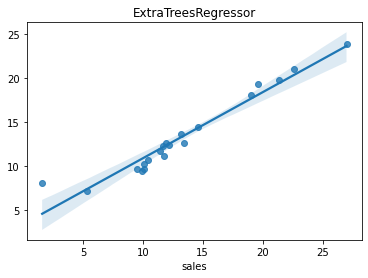

****************************************** XGBRegressor ********************************************************


[09:31:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor()


R2 Score is: 96.74540389652017


[09:31:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:31:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:31:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:31:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:31:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Cross Validation Score: -159.8804786538917


R2 Score - Cross Validation 

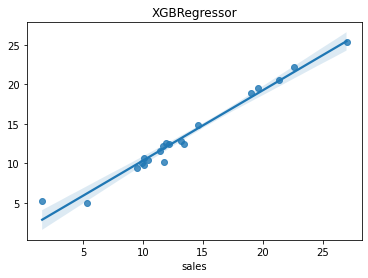

****************************************** LGBMRegressor ********************************************************


LGBMRegressor()


R2 Score is: 92.98868164029005


Cross Validation Score: -1068.9658692012933


R2 Score - Cross Validation Score is 1161.9545508415833
RMSE Score is: 1.545135364875947


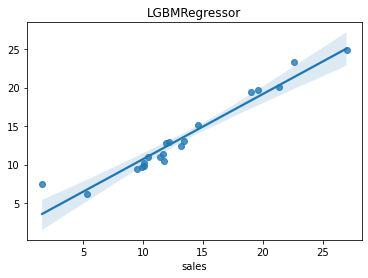

In [30]:
for name,model in models:
    print('******************************************',name,'********************************************************')
    
    print('\n')
    Model.append(name)
    
   
    model.fit(X_train, Y_train) #computer learing
    
    print(model)
    
    
    pred = model.predict(X_test)  #testing
    
    print('\n') 
    
   
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    score.append(r2)
    print('\n')
    
   
    cv_score = (cross_val_score(model,X_valid,Y_valid, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    cvs.append(cv_score)
    print('\n')
    
  
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)
    difference.append(result)
    
    
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    RMSE.append(rmse)
    
   
    sns.regplot(Y_test,pred)
    plt.title(name)
    plt.show()


In [31]:
result = pd.DataFrame({'Model': Model, 'r2score': score,'Cross_val_score': cvs,'RMSE score':RMSE,'Difference between cv score and cross_val score':difference})
result

,Model,r2score,Cross_val_score,RMSE score,Difference between cv score and cross_val score
0,LinearRegression,83.901652,6.349278,2.341302,77.552373
1,Ridge Regressor,83.923879,12.012199,2.339685,71.911680
2,Lasso Regressor,84.073632,12.992296,2.328762,71.081336
3,SVR,82.854366,-421.409423,2.416259,504.263789
4,DecisionTreeRegressor,68.830829,-225.163206,3.257837,293.994035
5,RandomForestRegressor,55.847944,-90.975891,3.877414,146.823835
6,KNeighborsRegressor,86.548228,-183.198835,2.140210,269.747063
7,GradientBoostingRegressor,87.989571,-1719.348219,2.022302,1807.337790
8,AdaBoostRegressor,94.146623,-226.681923,1.411789,320.828547
9,ExtraTreesRegressor,90.434457,24.814748,1.804769,65.619709


In [32]:
from sklearn.model_selection import GridSearchCV 
parameters = {'alpha':[1,1e-2,3],
               'fit_intercept':['True', 'False'],
               'copy_X':['True', 'False'],
 }


GSCV = GridSearchCV(Ridge(), parameters, cv=5)
GSCV.fit(X_train, Y_train)
GSCV.best_params_

{'alpha': 0.01, 'copy_X': 'True', 'fit_intercept': 'True'}

In [33]:
Final_Model = Ridge(alpha= 0.01, copy_X=True, fit_intercept= True,normalize=True)
regressor = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 83.9238789565764


In [34]:
import joblib


filename = "FinalModel_AdvertisementSalesprediction.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_AdvertisementSalesprediction.pkl']

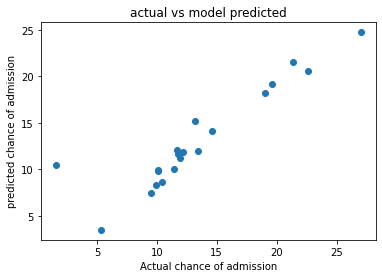

In [35]:
y_pred=regressor.predict(X_test)

plt.scatter(Y_test,y_pred)
plt.xlabel('Actual chance of admission')
plt.ylabel('predicted chance of admission')
plt.title('actual vs model predicted')
plt.show()

In [36]:
regressor_r2 = r2_score(Y_test,y_pred)*100
print("R2 score for the Model created is:", regressor)

R2 score for the Model created is: Ridge(alpha=0.01, normalize=True)
